Import Libraries

In [62]:
import pandas as pd
pd.set_option('display.precision', 3)
import io 
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px

from sklearn import set_config
set_config(display='text') #def is diagram but we want estimators to be as text

import warnings

warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [39]:
uploaded = files.upload()

Saving crabs.csv to crabs (1).csv


In [4]:
crabs_data = pd.read_csv("crabs.csv")
crabs_data = crabs_data.rename(columns = {'sp':'species', 'FL':'Frontal Lobe', 'RW':'Rear Width', 'CL':'Carapace Midline', 'CW':'Maximum Width', 'BD':'Body Depth'})

In [5]:
crabs_data["species"] = crabs_data["species"].map({'B':'Blue', 'O':'Orange'})
crabs_data["sex"]= crabs_data["sex"].map({'M':'Male', 'F':'Female'})

In [6]:
crabs_data.head()

,species,sex,index,Frontal Lobe,Rear Width,Carapace Midline,Maximum Width,Body Depth
0,Blue,Male,1,8.1,6.7,16.1,19.0,7.0
1,Blue,Male,2,8.8,7.7,18.1,20.8,7.4
2,Blue,Male,3,9.2,7.8,19.0,22.4,7.7
3,Blue,Male,4,9.6,7.9,20.1,23.1,8.2
4,Blue,Male,5,9.8,8.0,20.3,23.0,8.2


In [7]:
crabs_data.describe(include = 'all')

,species,sex,index,Frontal Lobe,Rear Width,Carapace Midline,Maximum Width,Body Depth
count,200,200,200.000,200.000,200.000,200.000,200.000,200.000
unique,2,2,NaN,NaN,NaN,NaN,NaN,NaN
top,Blue,Male,NaN,NaN,NaN,NaN,NaN,NaN
freq,100,100,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,25.500,15.583,12.738,32.105,36.415,14.030
std,NaN,NaN,14.467,3.495,2.573,7.119,7.872,3.425
min,NaN,NaN,1.000,7.200,6.500,14.700,17.100,6.100
25%,NaN,NaN,13.000,12.900,11.000,27.275,31.500,11.400
50%,NaN,NaN,25.500,15.550,12.800,32.100,36.800,13.900
75%,NaN,NaN,38.000,18.050,14.300,37.225,42.000,16.600


In [8]:
crabs_data.columns
crabs_data.shape


(200, 8)

In [9]:
crabs_data['class'] = crabs_data.species + crabs_data.sex
crabs_data['class'].value_counts()

BlueMale        50
BlueFemale      50
OrangeMale      50
OrangeFemale    50
Name: class, dtype: int64

In [10]:
crabs_data.head()

,species,sex,index,Frontal Lobe,Rear Width,Carapace Midline,Maximum Width,Body Depth,class
0,Blue,Male,1,8.1,6.7,16.1,19.0,7.0,BlueMale
1,Blue,Male,2,8.8,7.7,18.1,20.8,7.4,BlueMale
2,Blue,Male,3,9.2,7.8,19.0,22.4,7.7,BlueMale
3,Blue,Male,4,9.6,7.9,20.1,23.1,8.2,BlueMale
4,Blue,Male,5,9.8,8.0,20.3,23.0,8.2,BlueMale


In [11]:
data_columns = ['Frontal Lobe',	'Rear Width',	'Carapace Midline',	'Maximum Width', 'Body Depth']
crabs_data[data_columns].describe()

,Frontal Lobe,Rear Width,Carapace Midline,Maximum Width,Body Depth
count,200.000,200.000,200.000,200.000,200.000
mean,15.583,12.738,32.105,36.415,14.030
std,3.495,2.573,7.119,7.872,3.425
min,7.200,6.500,14.700,17.100,6.100
25%,12.900,11.000,27.275,31.500,11.400
50%,15.550,12.800,32.100,36.800,13.900
75%,18.050,14.300,37.225,42.000,16.600
max,23.100,20.200,47.600,54.600,21.600


Box Plot of the relevant features

<Axes: >

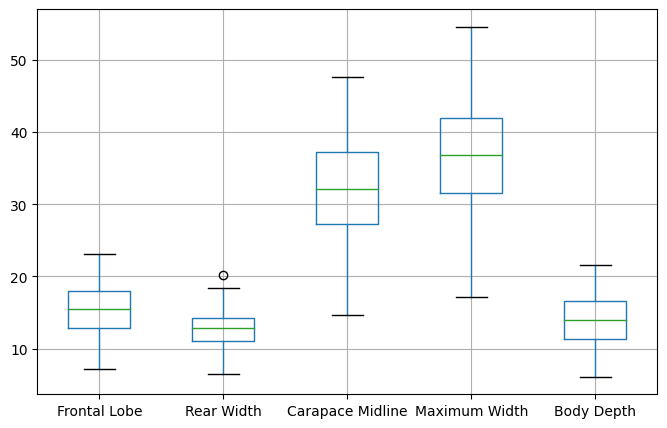

In [15]:
fig, ax = plt.subplots(figsize=(8,5))
crabs_data[data_columns].boxplot()

Initial visualization of classes

<Axes: title={'center': 'Frontal Lobe'}, xlabel='class'>

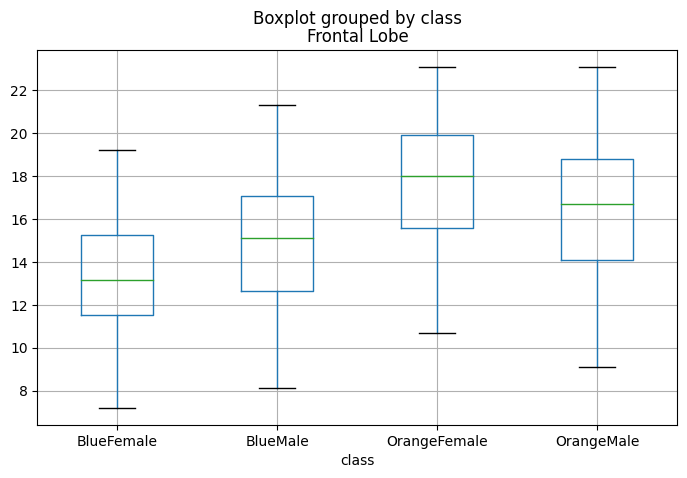

In [16]:
crabs_data.boxplot(column = 'Frontal Lobe', by = 'class', figsize = (8,5))

<Axes: title={'center': 'Rear Width'}, xlabel='class'>

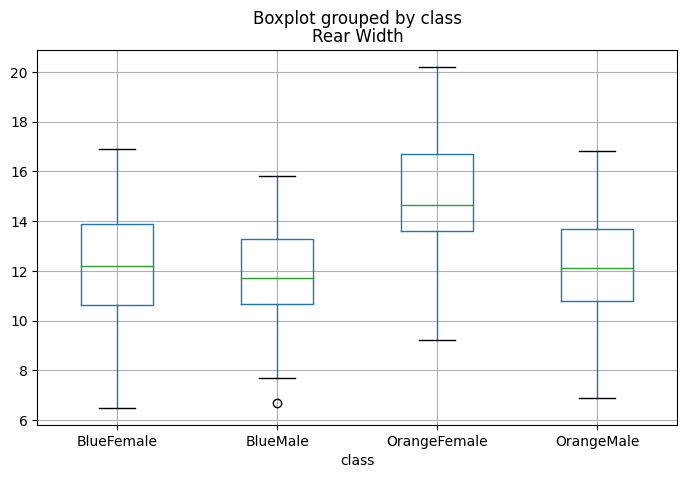

In [18]:
crabs_data.boxplot(column = 'Rear Width', by = 'class', figsize = (8,5))

<Axes: title={'center': 'Carapace Midline'}, xlabel='class'>

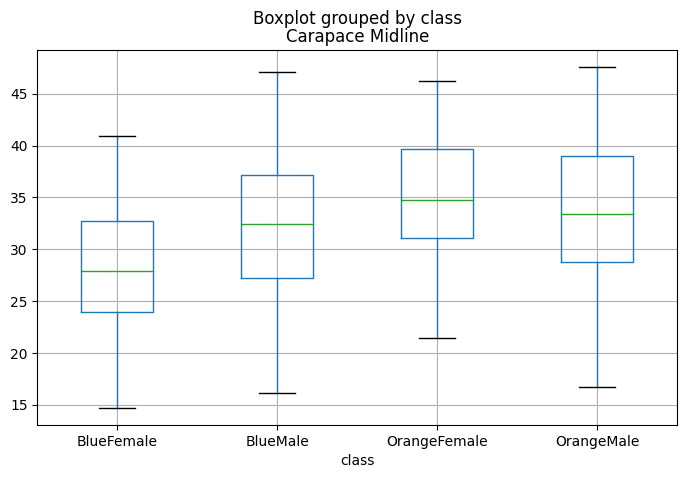

In [19]:
 crabs_data.boxplot(column = 'Carapace Midline', by = 'class', figsize = (8,5))

<Axes: title={'center': 'Maximum Width'}, xlabel='class'>

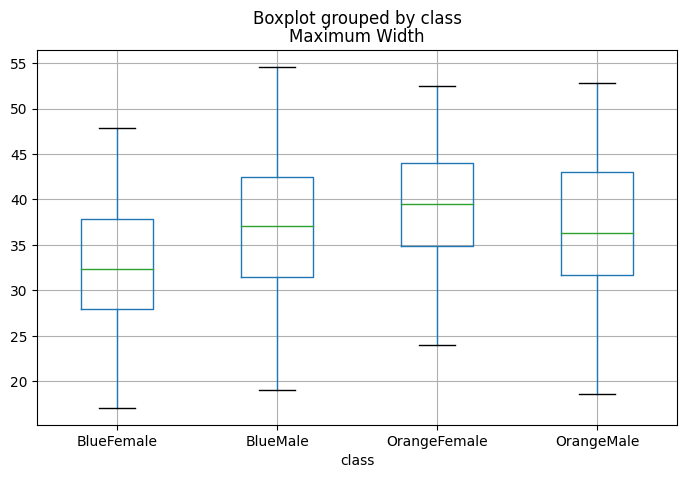

In [20]:
crabs_data.boxplot(column = 'Maximum Width', by = 'class', figsize = (8,5))

<Axes: title={'center': 'Body Depth'}, xlabel='class'>

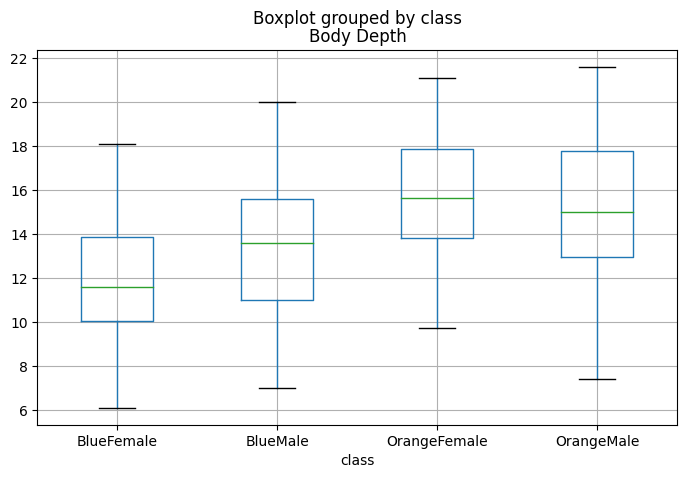

In [21]:
crabs_data.boxplot(column = 'Body Depth', by = 'class', figsize = (8,5))

Histograms Study

array([[<Axes: title={'center': 'Frontal Lobe'}>,
        <Axes: title={'center': 'Rear Width'}>,
        <Axes: title={'center': 'Carapace Midline'}>,
        <Axes: title={'center': 'Maximum Width'}>,
        <Axes: title={'center': 'Body Depth'}>]], dtype=object)

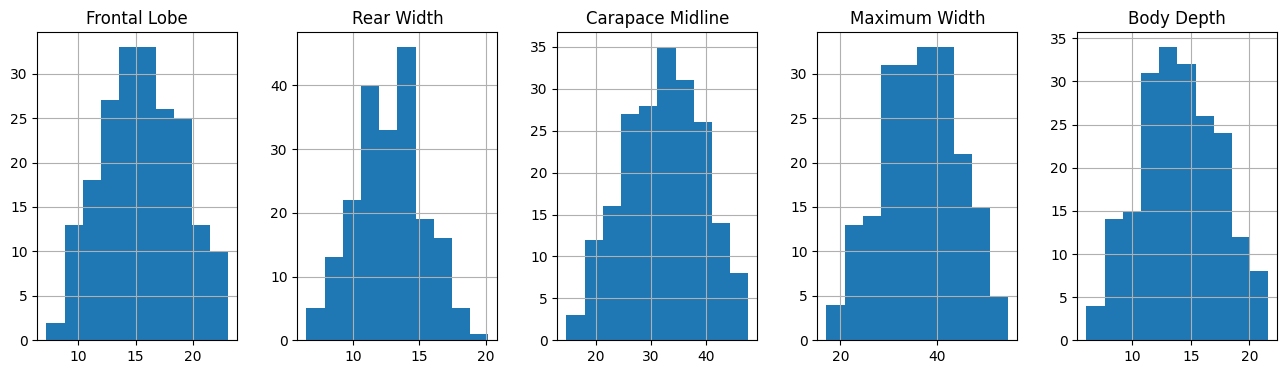

In [22]:
crabs_data[data_columns].hist(figsize=(16,4), layout = (1,5))

<Axes: xlabel='Frontal Lobe', ylabel='Count'>

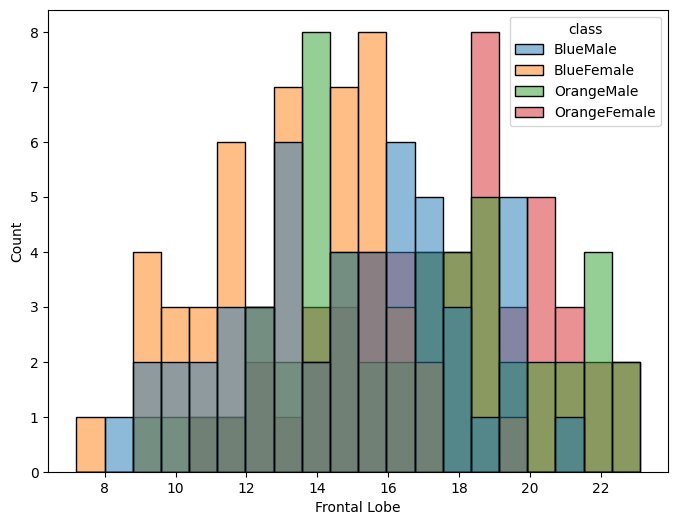

In [24]:
plt.figure(figsize=(8,6))
sns.histplot(crabs_data, x='Frontal Lobe', hue='class', bins=20)

<Axes: xlabel='Rear Width', ylabel='Count'>

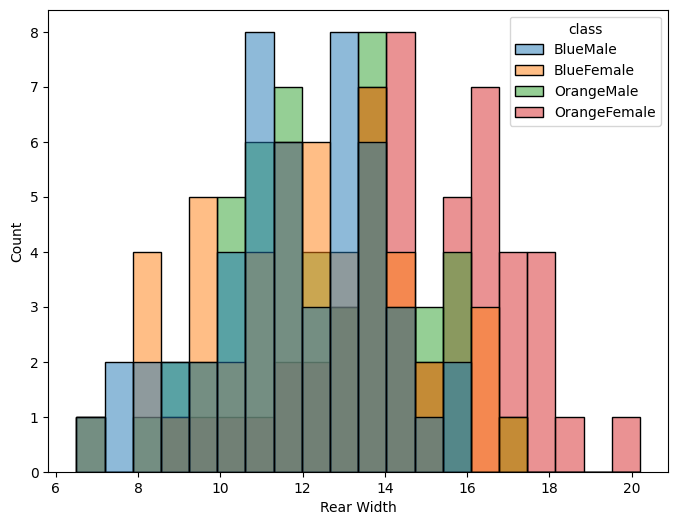

In [25]:
plt.figure(figsize=(8,6))
sns.histplot(crabs_data, x='Rear Width', hue='class', bins=20)

<Axes: xlabel='Maximum Width', ylabel='Count'>

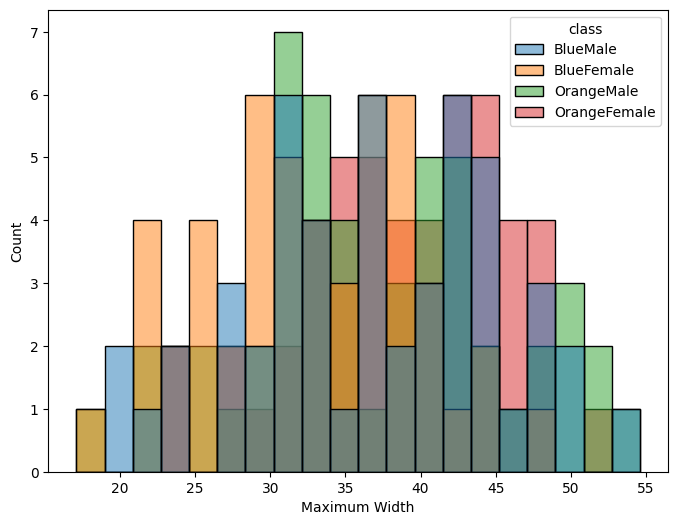

In [26]:
plt.figure(figsize=(8,6))
sns.histplot(crabs_data, x='Maximum Width', hue='class', bins=20)

<Axes: xlabel='Body Depth', ylabel='Count'>

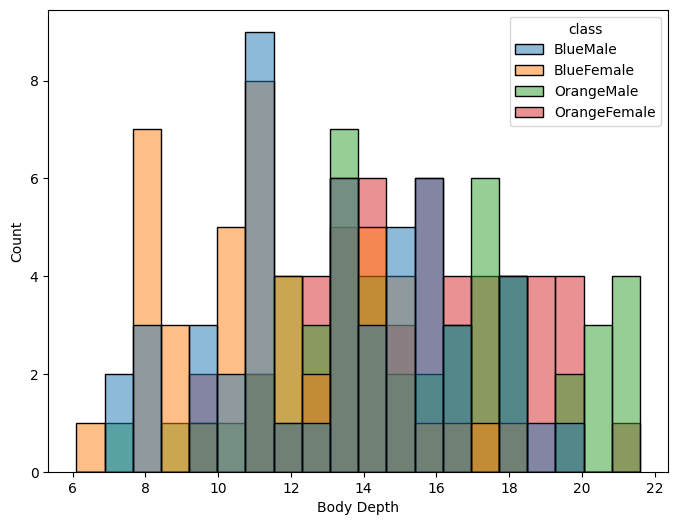

In [27]:
plt.figure(figsize=(8,6))
sns.histplot(crabs_data, x='Body Depth', hue='class', bins=20)

<Axes: xlabel='Carapace Midline', ylabel='Count'>

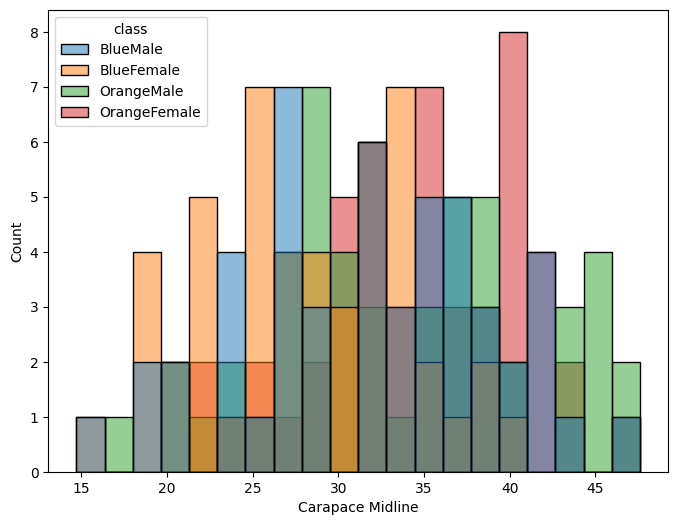

In [28]:
plt.figure(figsize=(8,6))
sns.histplot(crabs_data, x='Carapace Midline', hue='class', bins=20)

Pairplot to plot pairwise relations

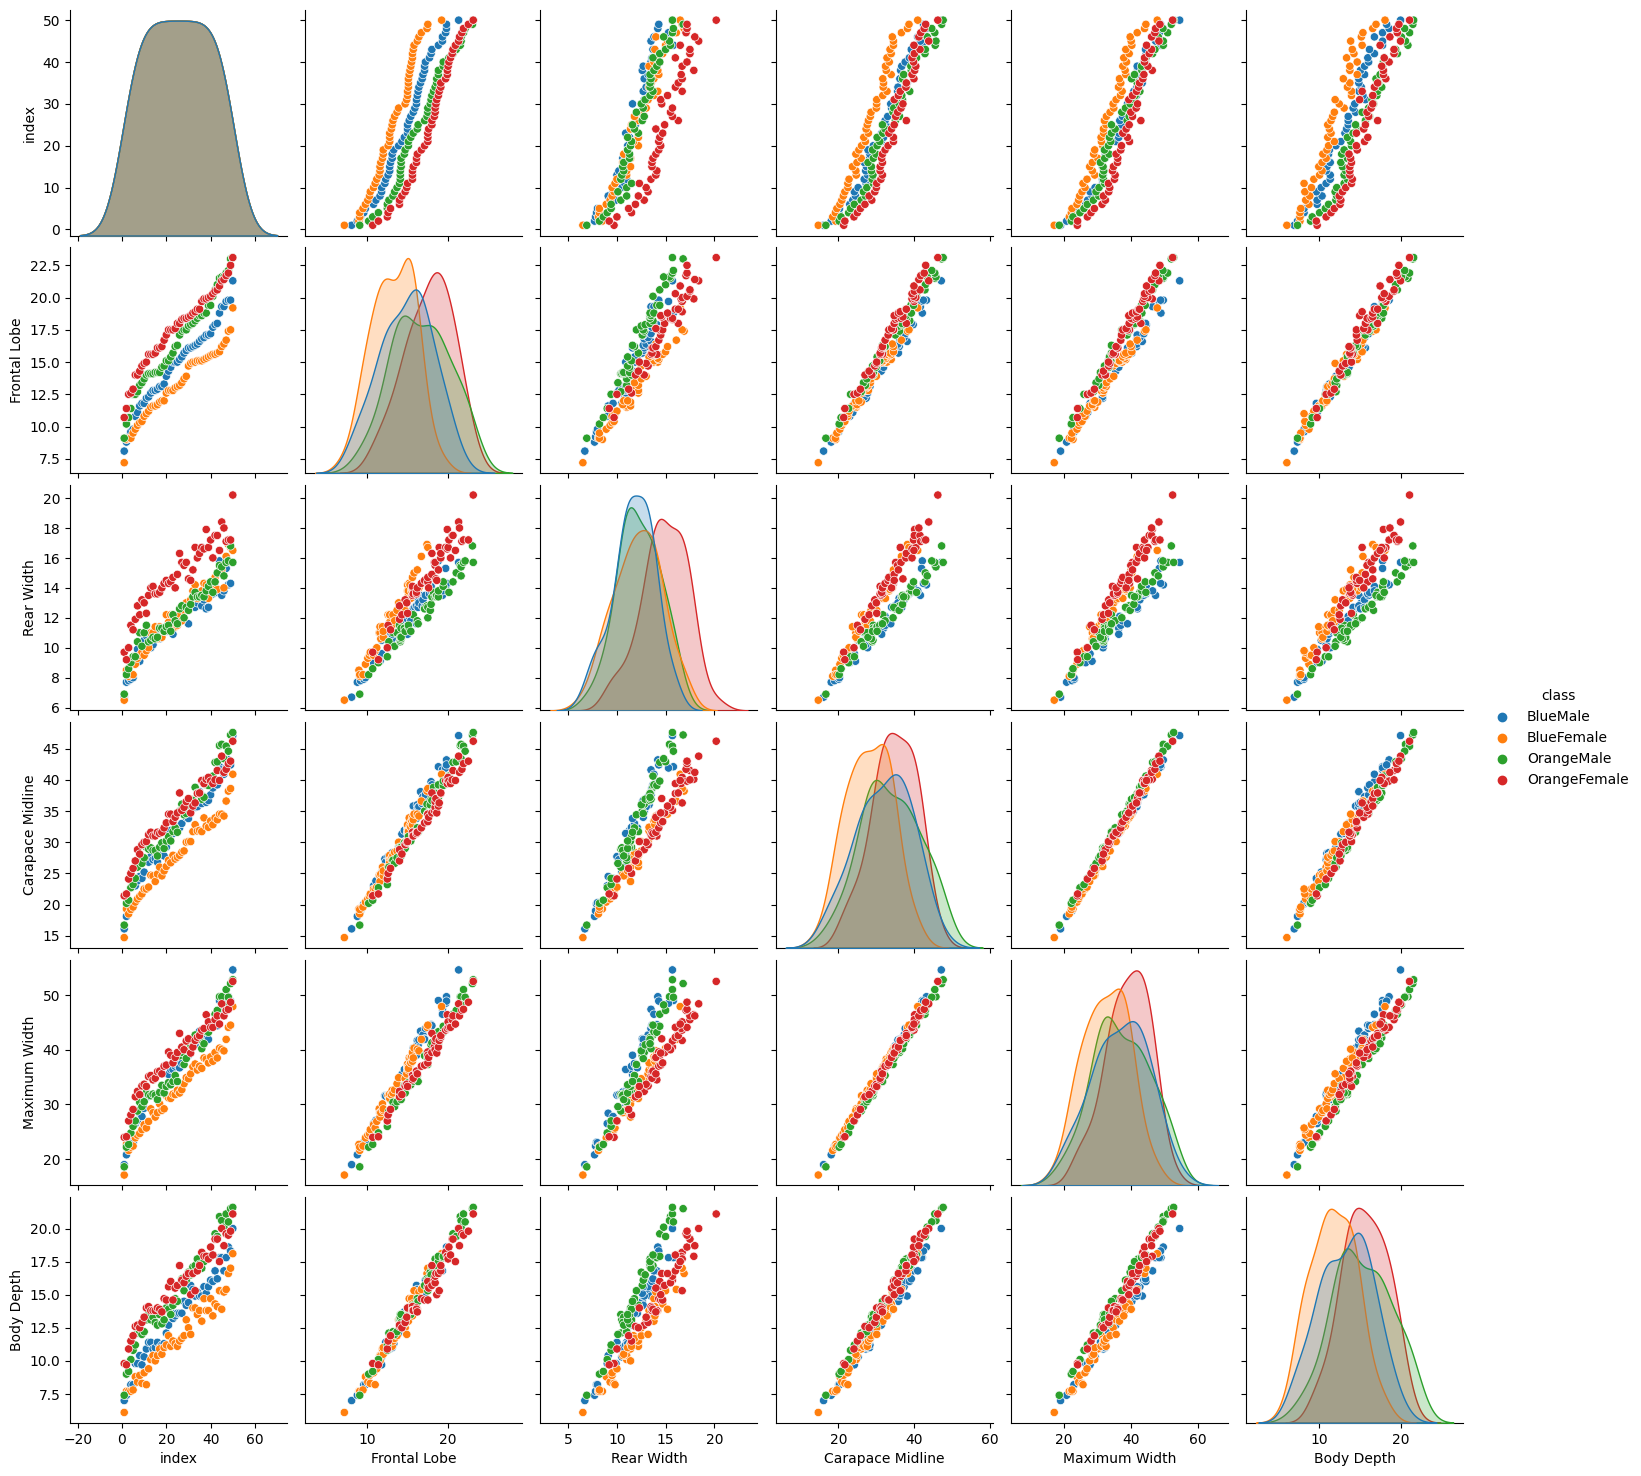

In [29]:
sns.pairplot(crabs_data,  hue='class')

### Discussion for using PCA

### USE OF PCA FOR BETTER VISUALISATION

FIRST STANDARDISE THE DATA TO HAVE MEAN 0 AND SD 1

In [ ]:
crabs_standardized = crabs_data.copy()
crabs_standardized[data_columns]= StandardScaler().fit_transform(crabs_data[data_columns])


In [35]:
crabs_standardized.describe().T

,count,mean,std,min,25%,50%,75%,max
index,200.0,2.550e+01,14.467,1.000,13.000,2.550e+01,38.000,50.000
Frontal Lobe,200.0,-7.105e-17,1.003,-2.404,-0.770,-9.465e-03,0.708,2.156
Rear Width,200.0,6.040e-16,1.003,-2.430,-0.677,2.396e-02,0.608,2.907
Carapace Midline,200.0,1.066e-16,1.003,-2.451,-0.680,-7.745e-04,0.721,2.182
Maximum Width,200.0,-4.974e-16,1.003,-2.460,-0.626,4.909e-02,0.711,2.316
Body Depth,200.0,0.000e+00,1.003,-2.321,-0.770,-3.820e-02,0.752,2.216


Lets proceed to PCA

In [38]:
myPCA = PCA().fit(crabs_standardized[data_columns])

print(myPCA.explained_variance_ratio_) #returns a vector of the variance explained by each dimension
print(myPCA.explained_variance_ratio_.cumsum()) # vector x such that x[i] returns the cumulative variance explained by the first i+1
                                                

[9.57766957e-01 3.03370413e-02 9.32659482e-03 2.22707143e-03
 3.42335531e-04]
[0.95776696 0.988104   0.99743059 0.99965766 1.        ]


#### ScreenPlot
used to determine nbr of principal componets tokeep in PCS

Text(0.5, 1.0, 'Scree Plot')

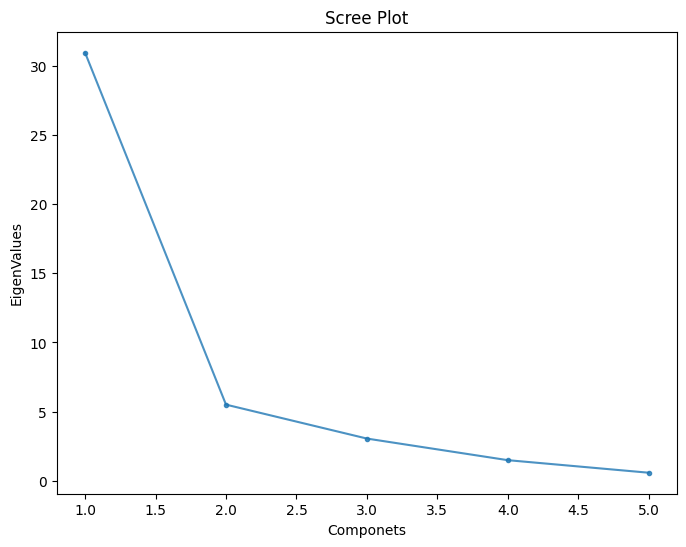

In [41]:
fig = plt.figure(figsize=(8,6))
plt.plot(range(1, len(myPCA.singular_values_)+1),myPCA.singular_values_, alpha=0.8,marker='.')
ylabel = plt.ylabel('EigenValues')
x_label = plt.xlabel('Componets')
plt.title('Scree Plot')


Explained variance by component

Text(0.5, 1.0, 'Percentage of variance explained by component')

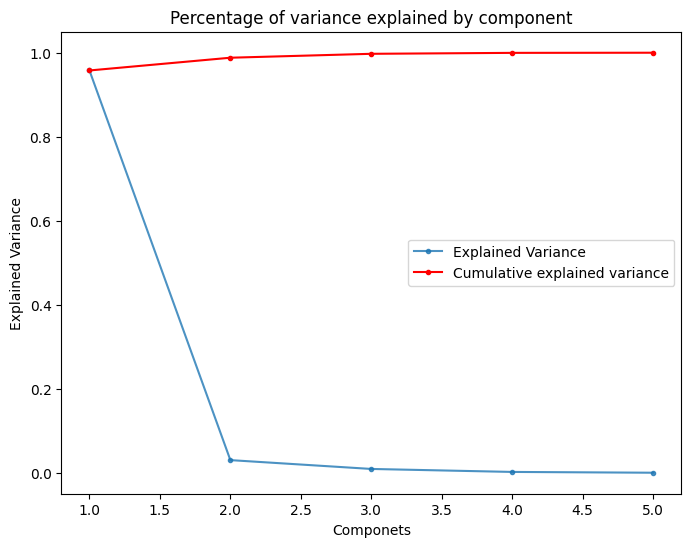

In [45]:
fig = plt.figure(figsize = (8,6))
plt.plot(range(1, len(myPCA.explained_variance_ratio_)+1), myPCA.explained_variance_ratio_, alpha = 0.8, marker='.', label = 'Explained Variance')
ylabel = plt.ylabel("Explained Variance")
x_label = plt.xlabel('Componets')
plt.plot(range(1, len(myPCA.explained_variance_ratio_)+1), np.cumsum(myPCA.explained_variance_ratio_), c='r', marker='.',label = 'Cumulative explained variance')
plt.legend()
plt.title('Percentage of variance explained by component')



Weights that the PCA assigns to componets

<Axes: >

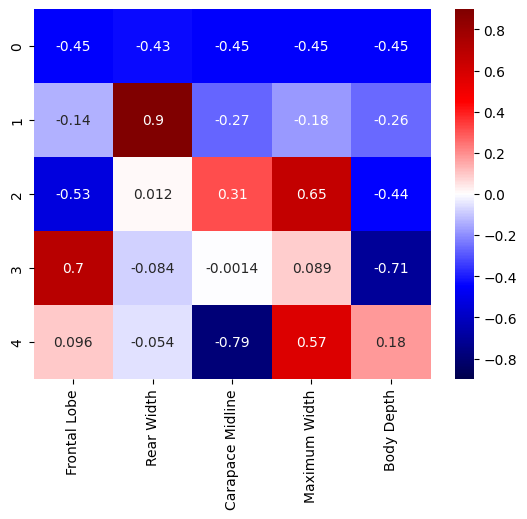

In [52]:
sns.heatmap(myPCA.components_, cmap='seismic', xticklabels=list(crabs_data.columns[3:-1]),
            vmin = -np.max(np.abs(myPCA.components_)), vmax = np.max(np.abs(myPCA.components_)),
            annot = True)

### PCA Transformation and visualization
using 2 or 3 componets

In [53]:
transformed = myPCA.transform(crabs_standardized[data_columns])
crabs_standardized[['PC1', 'PC2', 'PC3']] = transformed[:, :3]


visualize first 2 componets of PCA

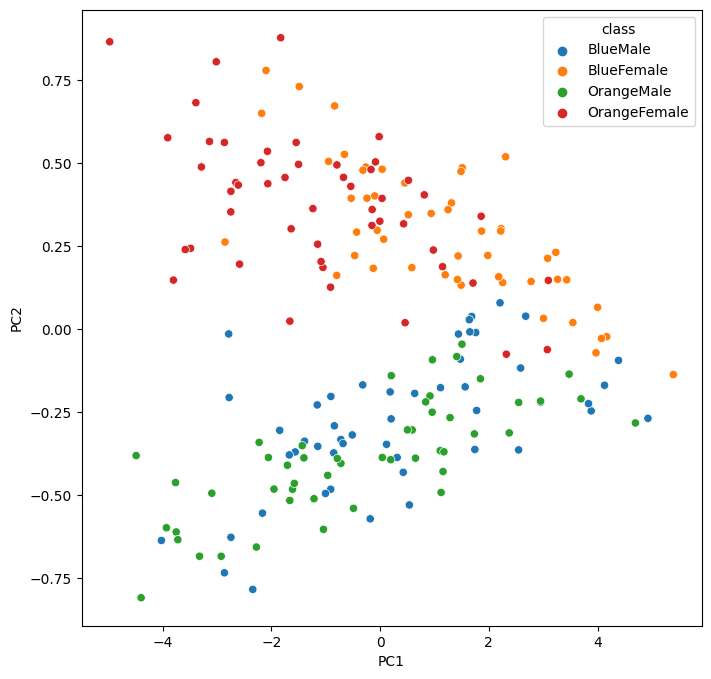

In [55]:
fig = plt.figure(figsize=(8,8))
_=sns.scatterplot(x = 'PC1', y='PC2', hue='class', data = crabs_standardized)

PCA is doing good work in separating the data

Visulaize with 3 components

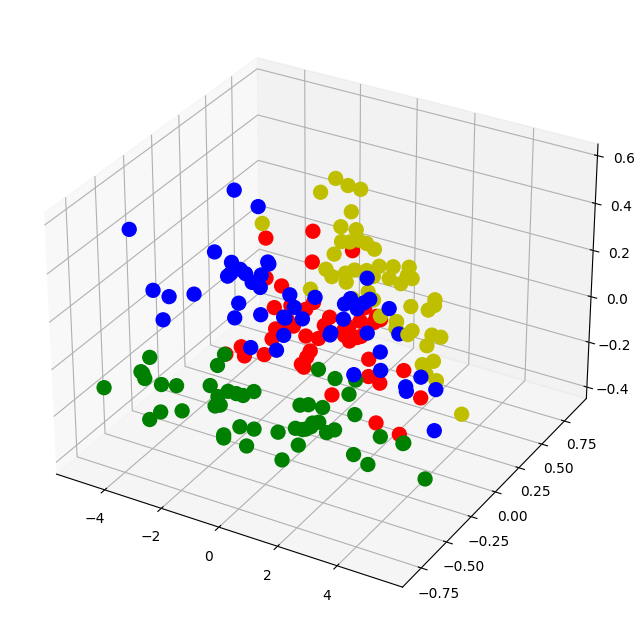

In [61]:
colors_crabs = {'BlueFemale':'y', 'BlueMale':'b', 'OrangeFemale':'r', 'OrangeMale':'g'}

fig = plt.figure(figsize=(8,8))
ax= fig.add_subplot(111, projection='3d')


plt.scatter(crabs_standardized.PC1, crabs_standardized.PC2, zs = crabs_standardized.PC3,
            depthshade = False, c=crabs_data['class'].apply(lambda x: colors_crabs[x]), s=100)

In [64]:
fig = px.scatter_3d(crabs_standardized, x='PC1', y='PC2', z='PC3', color='class')
fig.show()